In [ ]:
#!pip install obspy 

In [4]:
#Packages used
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from obspy.signal.detrend import polynomial
from scipy.optimize import curve_fit

# Critical Scale Invariance

From statistical mechanics we know that when a system is near to its critical point we can see long-range correlations, a non Gaussian behaviour and multifractality. These fluctuations are generally connected to the scale invariant and universal behaviour of the scaling function. In this project we have used the methods in the given article which is trying to show that the healthy heart rate dynamics show a near critical point like behaviour from a robust scale invariance in the incerement PDF.amics

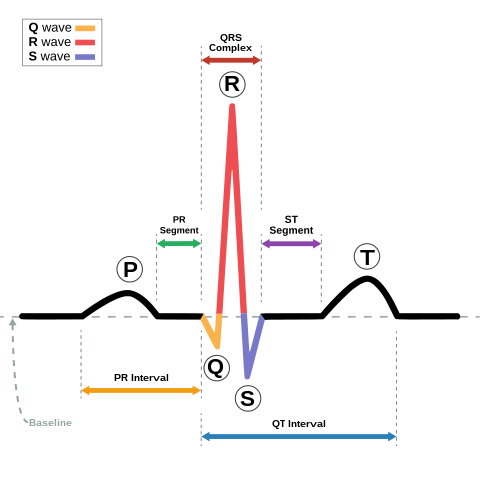

In [1]:
from IPython.display import Image
Image("rr_interval_image.png")

# Data selection

The data consists of the RR intervals of 11 individuals who didn’t have any clinical symptoms. RR interval is defined as the interval between each successive R peak. The R peak is defined from the heart beat graph shown here. We gathered the data of 11 individuals and collected them together by resizing them depending on the data with the minimum length. In this way we tried to assume that we are analyzing the same interval for each individual.
 

In [14]:
#list the files
filelist = os.listdir("rr_data_file")
if '.DS_Store' in filelist:
    filelist.remove('.DS_Store')
#read them into pandas
df_list = [pd.read_csv(f'rr_data_file/{file}',delimiter = "\t",names=[f'{file}']) for file in filelist]
min_len = min(map(len, df_list))
small_df = pd.concat(df_list,axis=1)
big_df = (small_df.T).apply(pd.to_numeric, errors='coerce')
cropped_df = big_df.iloc[:,:min_len]
batch1 = cropped_df.iloc[:,:int(cropped_df.shape[1]/2)]
batch2 = cropped_df.iloc[:,int(cropped_df.shape[1]/2):]
#print(batch1)

Because of the length of the data we decided two divide the data into 2 batches. And also we did a cleaning for the outliers according to our preference which gave us in total 4 batches.

In [19]:
#Reject the outliers
def reject_outliers(data):
    cleaned_rows = np.zeros((data.shape[0],data.shape[1]))
    N = data.shape[0]
    for i in range(N):
        
        row_data = data.iloc[i, :]

        row_mean = np.mean(row_data)
        row_std = np.std(row_data)
    
        threshold = 3
        lower_bound = row_mean - threshold * row_std
        upper_bound = row_mean + threshold * row_std
    
        outliers = np.logical_or(row_data < lower_bound, row_data > upper_bound)
    
        cleaned_row = np.where(outliers, np.nan, row_data)
        
        cleaned_rows[i,:] = np.array(cleaned_row)

    cleaned_data = np.array(cleaned_rows)
    return cleaned_data
batch1_cld = reject_outliers(batch1)
batch2_cld = reject_outliers(batch2)

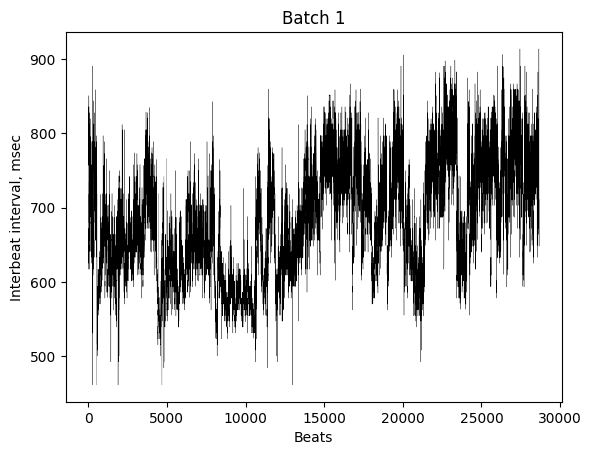

In [20]:
plt.plot(batch1_cld[0,:], color = 'black', linewidth=0.2)
plt.title('Batch 1')
plt.xlabel('Beats')
plt.ylabel('Interbeat interval, msec')
plt.show()

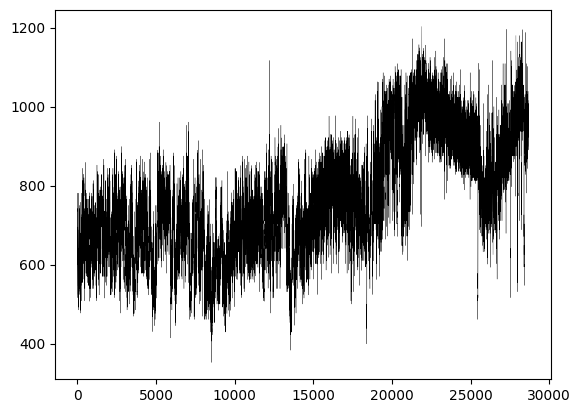

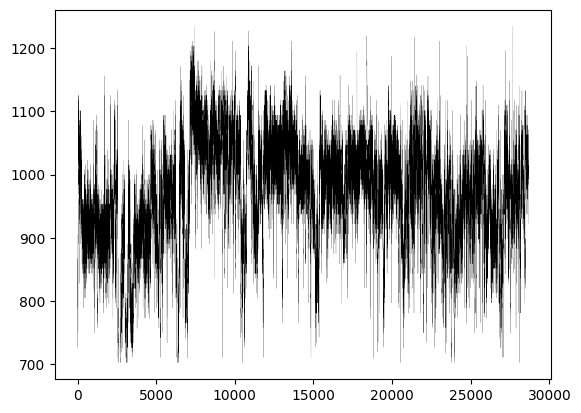

In [21]:
plt.plot(batch1_cld[1,:], color = 'black', linewidth=0.2)
plt.show()
plt.plot(batch1_cld[2,:], color = 'black', linewidth=0.1)
plt.show()

In [ ]:
plt.plot(batch2_cld[0,:], color = 'black', linewidth=0.1)
plt.title('Batch 2')
plt.xlabel('Beats')
plt.ylabel('Interbeat interval, msec')
plt.show()

plt.plot(batch2_cld[1,:], color = 'black', linewidth=0.1)
plt.show()

plt.plot(batch2_cld[2,:], color = 'black', linewidth=0.1)
plt.show()

Process
We first integrate
the ()i, ()m  Pm j1 bj, and the resultant Bm is
divided into sliding segments of size 2s. Then in each
segment the best qth order polynomial is fit to the data.
The differences 
sBi  Bi  s  Bi at a scale s
are obtained by sliding in time over the segments, where
Bi is a deviation from the polynomial fit. By this
procedure, the q  1th order polynomial trends are
eliminated and we analyze the whole PDF o
change s means fine grained to coarse grained scales (Kiyono 2006)f sBi.


In [ ]:
#code

In [ ]:
#collapse plot

all the data collapse on the
same curve, which is one of the characteristic features
observed in fluctuations at a critical point

conclusion

references
1) By Created by Agateller (Anthony Atkielski), converted to svg by atom. - SinusRhythmLabels.png, Public Domain, https://commons.wikimedia.org/w/index.php?curid=1560893
2) Irurzun, I. M., Garavaglia, L., Defeo, M. M., & Thomas Mailland, J. (2021). RR interval time series from healthy subjects (version 1.0.0). PhysioNet. https://doi.org/10.13026/51yd-d219
3)Leopoldo Garavaglia, Damián Gulich, Magdalena M Defeo, Julieta Thomas Mailland, Isabel M. Irurzun, The Effect of Age on the Heart Rate Variability of Healthy Subjects, Plos One.
4) Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.